# Metro Ridership Background Information (2024)

**Source**: [WMATA Metrorail Ridership Summary](https://www.wmata.com/initiatives/ridership-portal/Metrorail-Ridership-Summary.cfm)

---

#### Average Daily Entries Per Day over the Whole Year For All Metrorail Stations
- **Total Average**: 394,582 entries
- There are 98 stations so the **Average Daily Entries Per Station** is: 4026 entries

#### Average Daily Entries Over All Stations by Day of the Week
- **Mondays**: 339,775
- **Tuesdays**: 423,610
- **Wednesdays**: 427,648
- **Thursdays**: 420,062
- **Fridays**: 362,359
- **Saturdays**: 270,954
- **Sundays**: 204,772

**Observation**:  
- **Highest**: Mid-week (Tuesday to Thursday)  
- **Lowest**: Weekends  
- **Assumption**: A large portion of people primarily use the metro for commuting.

---

#### Average Daily Entries of All Stations by Month in 2024
- **January**: 288,410
- **February**: 328,881
- **March**: 372,934
- **April**: 384,630
- **May**: 363,360
- **June**: 360,303
- **July**: 356,562
- **August**: 329,019
- **September**: 365,487
- **October**: 400,764
- **November**: 333,920
- **December**: 314,386

---

#### Average Daily Entries by Season
- **Spring (March, April, May)**: 373,641
- **Summer (June, July, August)**: 348,628
- **Fall (September, October, November)**: 366,723
- **Winter (December, January, February)**: 310,559

**Observation**:  
- **Least Busy**: Summer and Winter  
- **Most Busy**: Fall and Spring
- **17% decrease in ridership** between Spring and WInter


In [72]:
#import statements for running visualizations
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_cmap

#INITIAL DATASETS (entries only)
#data regarding location and specs of each metrorail station
stations_df = pd.read_csv("metro_stations.csv") 

#dataset on Average daily entries by station by month for all days of the week in 2024
av_by_month_df = pd.read_csv("All_Months.csv") 

#compiled average annual daily entries for all days, weekdays, and weekends in respective order 
av_boardings_for_year = pd.read_csv("Annual_Station_Boarding_Compiled.csv") 

#average data for entries of all stations and the specs of each station
merged_df = av_by_month_df.merge(stations_df, left_on='Station Name', right_on='NAME', how='left') 
#Note: merged_df is a result of merging All_Months.csv and metro_stations.csv on Station Name

#SECONDARY DATASETS (entries & exits for each individual day) 
#entries and exits per each day and station in 2024 (numeric only)
entries_exits_df = pd.read_csv("entries_exits_transformed_data.csv")

#entries and exits per each day and station in 2024 merged with metro_stations.csv
entires_exits_station_specs_df = pd.read_csv("everyday_2024_w_metro_station.csv")


C:\Users\adrie\AppData\Local\Temp\ipykernel_25492\3179806528.py:27: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  entires_exits_station_specs_df = pd.read_csv("everyday_2024_w_metro_station.csv")


C:\Users\adrie\AppData\Local\Temp\ipykernel_25492\1782083912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEASON', y='Average Daily Entries Across All Stations', data=seasonal_avg_ridership,


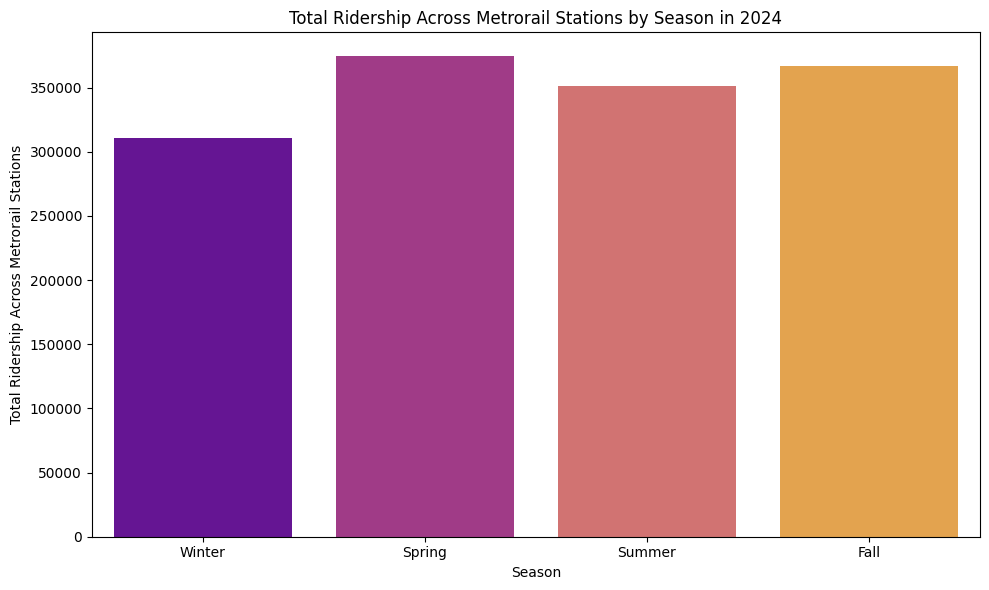

In [73]:
#HISTOGRAM OF AVERAGE DAILY RIDERSHIP BY SEASON IN 2024

season_order = ['Winter', 'Spring', 'Summer', 'Fall']

seasonal_avg_ridership = av_by_month_df.groupby('SEASON')['Total Daily Entries'].mean().reset_index()

# mult av by 98 to get the total ridership for all stations
seasonal_avg_ridership['Average Daily Entries Across All Stations'] = seasonal_avg_ridership['Total Daily Entries'] * 98

plt.figure(figsize=(10, 6))

sns.barplot(x='SEASON', y='Average Daily Entries Across All Stations', data=seasonal_avg_ridership, 
            palette="plasma", order=season_order)

plt.title('Total Ridership Across Metrorail Stations by Season in 2024')
plt.xlabel('Season')
plt.ylabel('Total Ridership Across Metrorail Stations')
plt.tight_layout()
plt.show()



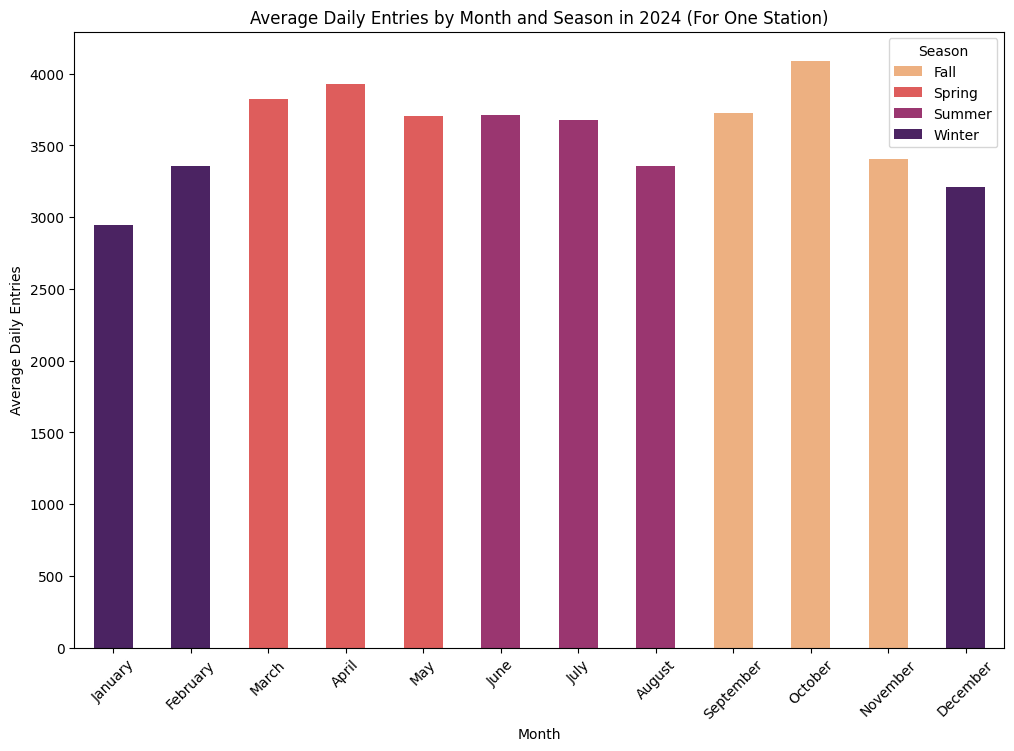

In [74]:
#HISTOGRAM OF AVERAGE TOTAL DAILY ENTRIES BY MONTH AND SEASON

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# group by season and month then calc avg daily entries
monthly_seasonal_entries = merged_df.groupby(['MONTH', 'SEASON'])['Total Daily Entries'].mean().unstack()

monthly_seasonal_entries.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='flare')
plt.title('Average Daily Entries by Month and Season in 2024 (For One Station)')
plt.ylabel('Average Daily Entries')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()



C:\Users\adrie\AppData\Local\Temp\ipykernel_25492\275784406.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MONTH'] = pd.Categorical(filtered_df['MONTH'], categories=month_order, ordered=True)


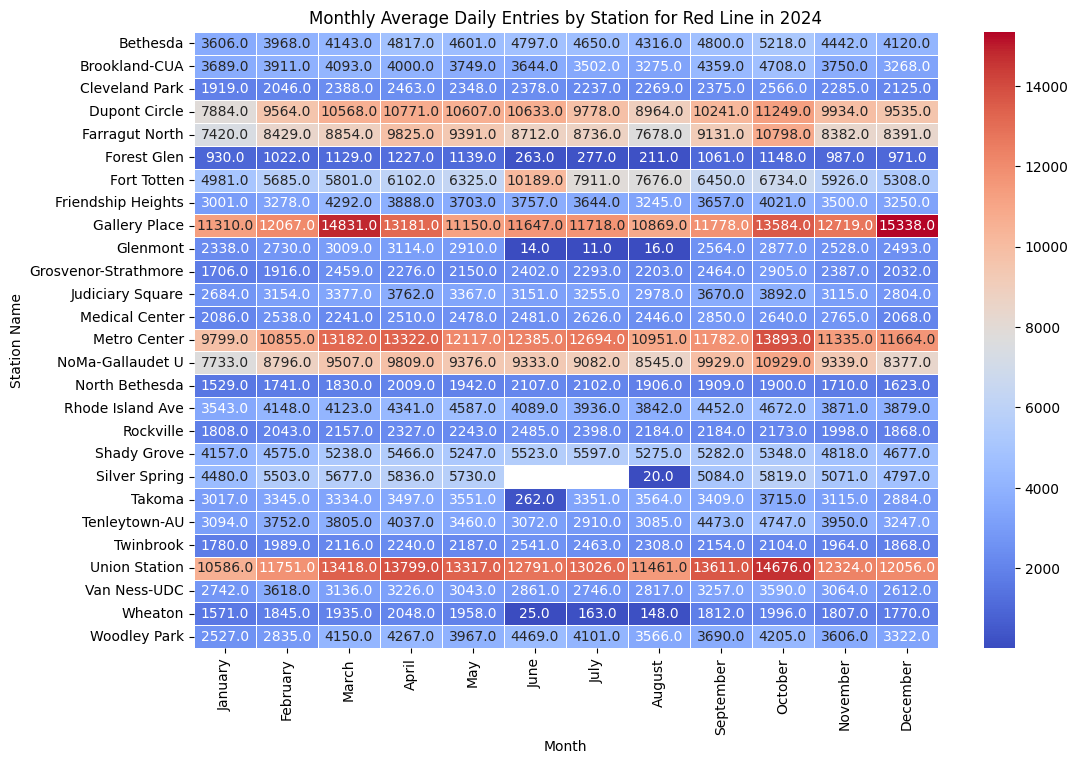

In [75]:
#HEATMAP OF MONTHLY TOTAL DAILY ENTRIES BY STATION BY LINE

user_input_line = input("Enter the line color (green, blue, yellow, red, silver, orange): ")
filtered_df = merged_df[merged_df['LINE'].str.contains(user_input_line, case=False, na=False)] #All_Months.csv so can't filter by time of week

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

filtered_df['MONTH'] = pd.Categorical(filtered_df['MONTH'], categories=month_order, ordered=True)

pivot = filtered_df.pivot_table(index='Station Name', columns='MONTH', values='Total Daily Entries', aggfunc='mean')

pivot = pivot.reindex(columns=month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title(f'Monthly Average Daily Entries by Station for {user_input_line.capitalize()} Line in 2024')
plt.ylabel('Station Name')
plt.xlabel('Month')
plt.show()



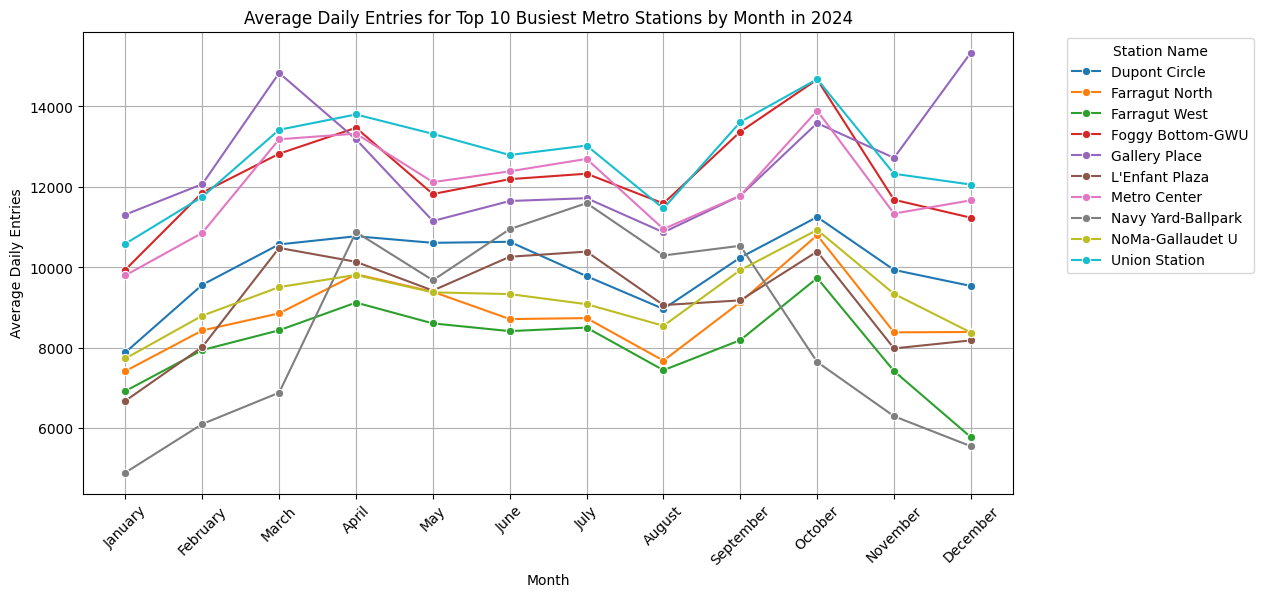

In [76]:
#LINE GRAPH OF AVERAGE DAILY ENTRIES FOR THE TOP 10 BUSIEST METRO STATIONS BY MONTH IN 2024

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# top 10 busiest stations based on total daily entries
top_10_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().nlargest(10).index

filtered_df = merged_df[merged_df["Station Name"].isin(top_10_stations)]

# average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Top 10 Busiest Metro Stations by Month in 2024")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()


In January and February, the average daily entries are at the lowest levels for all of the 10 listed stations, which can be attributed to the cold weather that discourages many people from stepping out and riding the metro.

In March, the average daily entries for Gallery Place suddenly reaches its first peak, which can be attributed to the warming weather and cherry blossom season. There are also many attractions nearby such as the National Portrait Gallery, Smithsonian American Art Museum, Capital One Arena, Shakespeare Theater, Kogo Courtyard, and more. 

In April, the average daily entries for Union Station reaches its first peak, which can be attributed to the its many attractions nearby that people can enjoy in the warming weather, such as touring government buildings, visiting the Library of Congress, enjoying the blossomg trees at the National Japanese American Memorial. Some other popular destinations nearby are the National Air and Space Museum, the National Gallery of Art, and the U.S. Botanic Garden.

From May to August, the average daily entries are at the lowest levels for 9 out of 10 of the listed stations, which can be attributed to traveling out of state or out of the country by car or plane for vacation during the hot summer months.

In September, the average daily entries for 9 out of all of the 10 listed stationsdrastically increase and reach their peak in October. This may be attributed to popular events such as the Adams Morgan Day Festival, the DC State Fair, and the DC Jazz Fest in September, as well as the Oktoberfest, the Snallygaster, the Capital City Africa Cup, and the Fall Wine Festival in October. It is also the beginning of the Fall semester, so many commutes for college-going students begin this season, along with Halloween festivites.

In November and December, the average daily entres for all of the 10 listed stations decrease except for Gallery Place, which can be attributed to dropping temperatures discourage most metro riders, except for those interested in the Christmas festivities near Gallery Place. 

***I might not include the temperature information because we're not taking temperature data and comparing it alongside this ridership data. I feel like we can make a heatmap of the highest riderships for each season in the DC area.



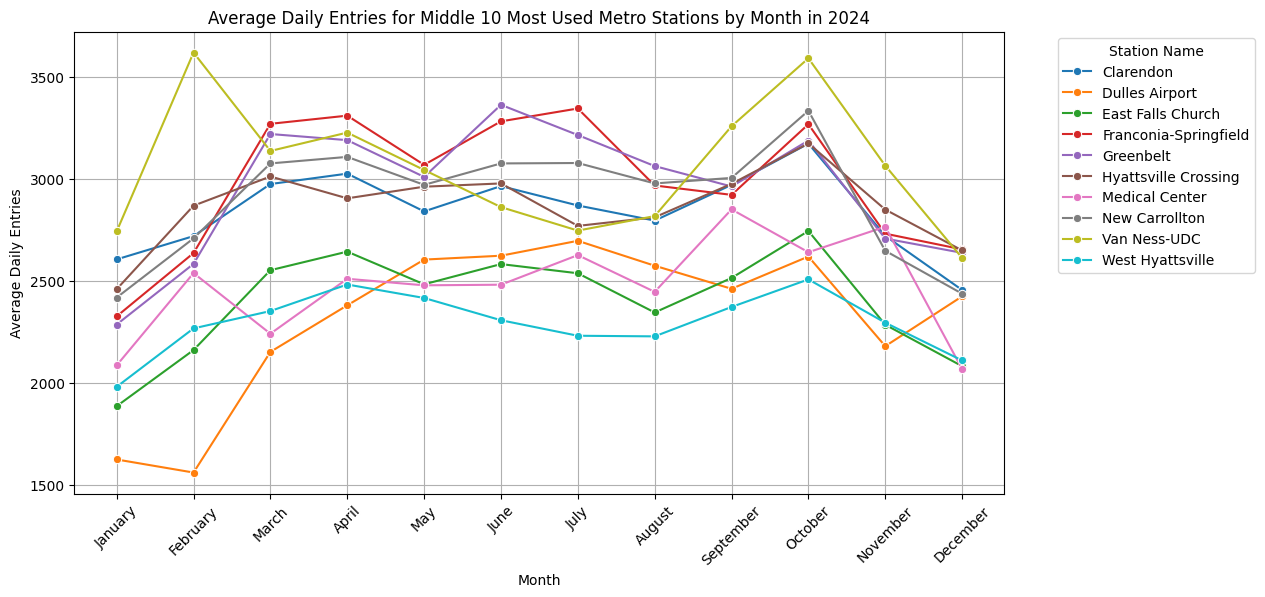

In [77]:
#LINE GRAPH OF AVERAGE DAILY ENTRIES FOR THE MIDDLE 10 MOST USED METRO STATIONS BY MONTH IN 2024

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# get the middle 10 stations
sorted_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().sort_values(ascending=False)
middle_index_start = len(sorted_stations) // 2 - 5  # Start index (centered)
middle_10_stations = sorted_stations.iloc[middle_index_start : middle_index_start + 10].index

filtered_df = merged_df[merged_df["Station Name"].isin(middle_10_stations)]

# average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Middle 10 Most Used Metro Stations by Month in 2024")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()


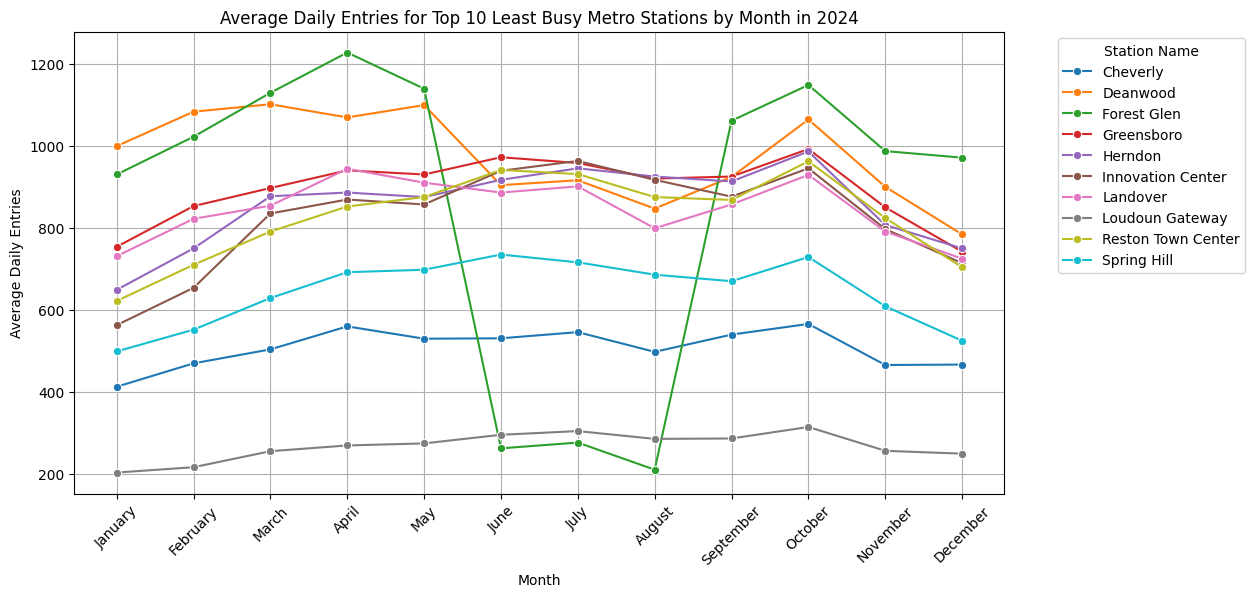

In [78]:
#LINE GRAPH OF AVERAGE DAILY ENTRIES FOR THE MIDDLE 10 LEAST BUSY METRO STATIONS BY MONTH IN 2024

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# top 10 least busy stations based on total daily entries
top_10_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().nsmallest(10).index

filtered_df = merged_df[merged_df["Station Name"].isin(top_10_stations)]

# average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Top 10 Least Busy Metro Stations by Month in 2024")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()

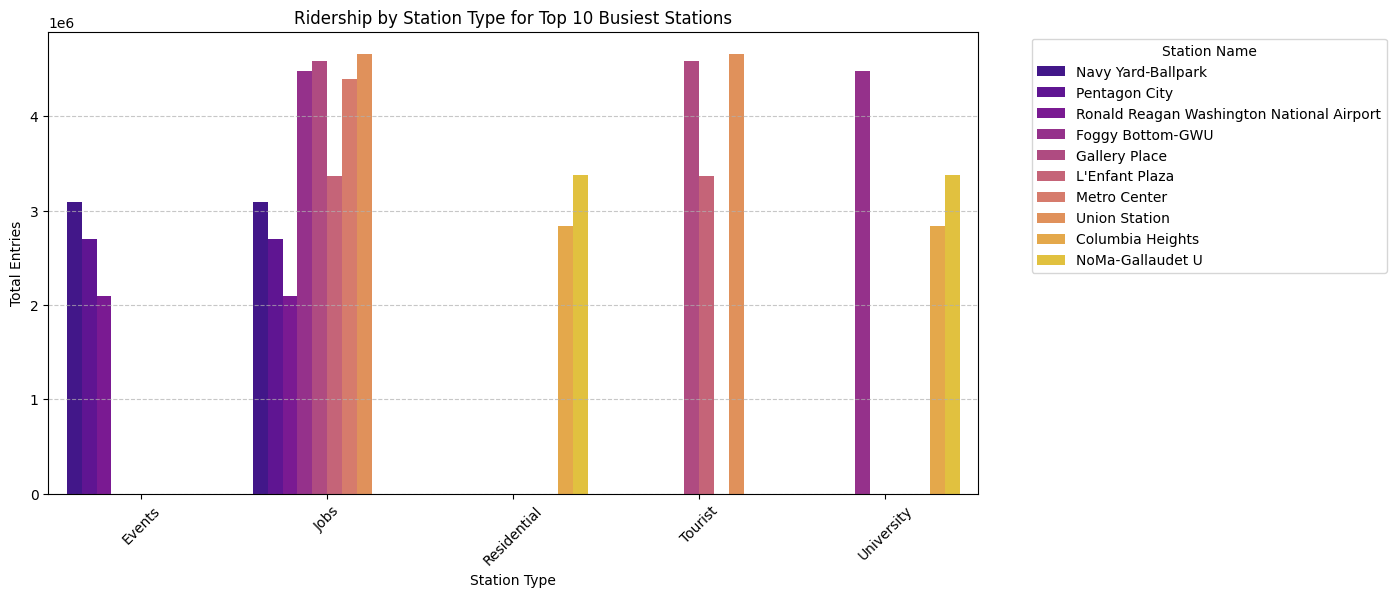

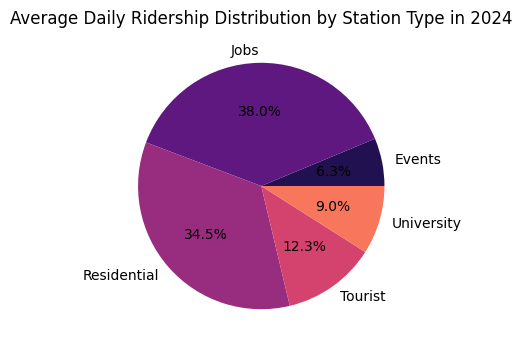

In [79]:
#GROUPED BAR CHART AND PIE CHART OF RIDERSHIP BY STATION TYPE

# Load dataset with specified dtypes to prevent mixed types warning
everyday_2024_w_metro_station_df = pd.read_csv(
    "everyday_2024_w_metro_station.csv",
    dtype={
        "LINE_2": str,
        "LINE_3": str,
        "LINE_4": str,
        "LINE_5": str
    }
)

# Ensure relevant columns exist
if "STATION_TYPE_1" in everyday_2024_w_metro_station_df.columns and "STATION_TYPE_2" in everyday_2024_w_metro_station_df.columns:
    # Convert "Total Entries" to numeric to fix scale issues
    everyday_2024_w_metro_station_df["Total Entries"] = pd.to_numeric(everyday_2024_w_metro_station_df["Total Entries"], errors="coerce")

    # Select relevant columns and unpivot station types into a single column
    melted_df = everyday_2024_w_metro_station_df.melt(
        id_vars=["Total Entries", "Station Name"],  # Keep station name for grouping
        value_vars=["STATION_TYPE_1", "STATION_TYPE_2"], 
        var_name="Type Column", 
        value_name="Station Type"
    )

    # Drop NaN values in the Station Type column
    melted_df = melted_df.dropna(subset=["Station Type"])

    # top 10 busiest stations based on total ridership
    top_10_stations = melted_df.groupby("Station Name")["Total Entries"].sum().nlargest(10).index
    filtered_df = melted_df[melted_df["Station Name"].isin(top_10_stations)]

    # group by station type and station name, then sum total ridership
    station_type_data = filtered_df.groupby(["Station Type", "Station Name"])["Total Entries"].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=station_type_data, x="Station Type", y="Total Entries", hue="Station Name", palette="plasma")

    # Graphed bar chart
    plt.title("Ridership by Station Type for Top 10 Busiest Stations")
    plt.ylabel("Total Entries")
    plt.xlabel("Station Type")
    plt.xticks(rotation=45)
    plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
    # Group by station type and sum total ridership
    station_type_summary = melted_df.groupby("Station Type")["Total Entries"].sum().reset_index()

    # Calculate average ridership per station type
    station_counts = melted_df.groupby("Station Type")["Station Name"].nunique().reset_index()
    station_counts.rename(columns={"Station Name": "Number of Stations"}, inplace=True)
    
    station_type_summary = station_type_summary.merge(station_counts, on="Station Type")
    station_type_summary["Avg Entries per Station"] = station_type_summary["Total Entries"] / station_type_summary["Number of Stations"]

    # Pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(station_type_summary["Total Entries"], labels=station_type_summary["Station Type"], autopct="%1.1f%%", colors=sns.color_palette("magma"))
    plt.title("Average Daily Ridership Distribution by Station Type in 2024")
    plt.show()

else:
    print("Error: STATION_TYPE_1 and/or STATION_TYPE_2 columns are missing from the dataset.")


C:\Users\adrie\AppData\Local\Temp\ipykernel_25492\3992862104.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=line_ridership, x="Metro Line", y="Total Yearly Ridership", palette= colors)


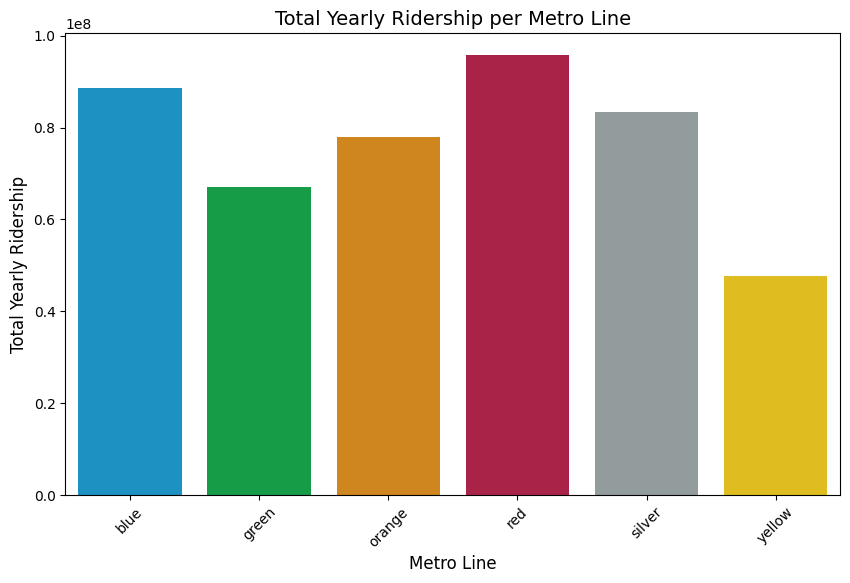

  Metro Line  Total Yearly Ridership
0       blue                88558285
1      green                67031008
2     orange                78045014
3        red                95759772
4     silver                83468273
5     yellow                47767306


In [80]:
#HISTOGRAM OF LINES AND RIDERSHIP (ENTRIES + EXITS)
everyday_2024_w_metro_station_df["Total Yearly Ridership"] = everyday_2024_w_metro_station_df["Total Entries"] + everyday_2024_w_metro_station_df["Total Exits"]

# Unpivot the LINE columns 
df_melted = everyday_2024_w_metro_station_df.melt(
    id_vars=["Total Yearly Ridership"], 
    value_vars=["LINE_1", "LINE_2", "LINE_3", "LINE_4", "LINE_5"], 
    var_name="Line_Type", 
    value_name="Metro Line"
)

# Drop rows where Metro Line is NaN 
df_melted = df_melted.dropna(subset=["Metro Line"])

# Group by Metro line and sum ridership
line_ridership = df_melted.groupby("Metro Line")["Total Yearly Ridership"].sum().reset_index()

#assign colors to bars (from metro colorscheme)
line_colors = {
    "red": "#BF0D3E",        
    "blue": "#009CDE",       
    "orange": "#ED8B00",     
    "yellow": "#FFD100",     
    "green": "#00B140",      
    "silver": "#919D9D"      
}
colors = [line_colors.get(line.lower(), "gray") for line in line_ridership["Metro Line"]]

plt.figure(figsize=(10, 6))
sns.barplot(data=line_ridership, x="Metro Line", y="Total Yearly Ridership", palette= colors)
plt.title("Total Yearly Ridership per Metro Line", fontsize=14)
plt.xlabel("Metro Line", fontsize=12)
plt.ylabel("Total Yearly Ridership", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

print(line_ridership) #range 0-1 not actual so we need to fix

In [81]:
df = stations_df

# make sure STATION_TYPE is converted to lists right
df["STATION_TYPE"] = df["STATION_TYPE"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# split line in list if not split
df["LINE"] = df["LINE"].apply(lambda x: x.split(",") if isinstance(x, str) else x)

station_counts = {}
for _, row in df.iterrows(): #count station type per row
    for line in row["LINE"]:
        line = line.strip()  
        if line not in station_counts:
            station_counts[line] = {}
        for station_type in row["STATION_TYPE"]:
            station_counts[line][station_type] = station_counts[line].get(station_type, 0) + 1

# print
for line, counts in station_counts.items():
    print(f"Metro Line: {line}")
    for station_type, count in counts.items():
        print(f"   - {station_type}: {count}")




Metro Line: green
   - Residential: 15
   - Events: 3
   - University: 3
   - Jobs: 5
   - Tourist: 5
Metro Line: blue
   - Residential: 12
   - Jobs: 16
   - Tourist: 4
   - Events: 3
   - University: 1
Metro Line: yellow
   - Residential: 5
   - Jobs: 11
   - Tourist: 4
   - Events: 2
Metro Line: orange
   - Residential: 15
   - Tourist: 3
   - Events: 1
   - Jobs: 15
   - University: 1
Metro Line: silver
   - Residential: 21
   - Tourist: 3
   - Events: 2
   - Jobs: 16
   - University: 1
Metro Line: red
   - Residential: 18
   - University: 4
   - Jobs: 8
   - Tourist: 3


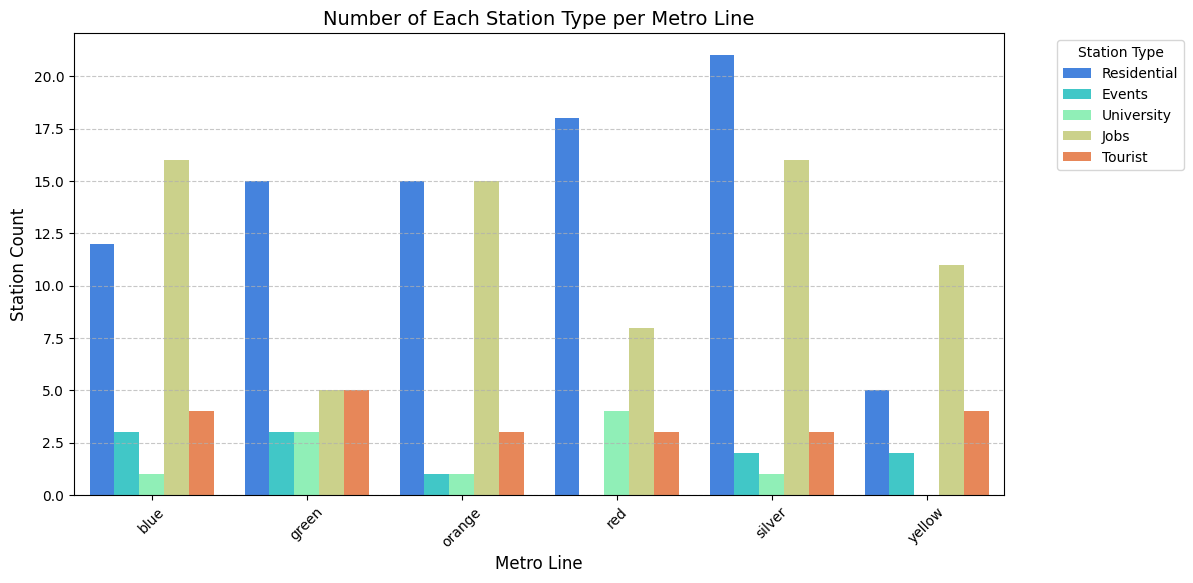

In [82]:
#BREAKDOWN OF NUMBER OF EACH STATION TYPE BY LINE

#based on dictionary created from previous kernel
data_list = []
for line, counts in station_counts.items():
    for station_type, count in counts.items():
        data_list.append({"Metro Line": line, "Station Type": station_type, "Count": count})

df_plot = pd.DataFrame(data_list)

x_axis_order = ['blue', 'green', 'orange', 'red', 'silver', 'yellow']

# grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="Metro Line", y="Count", hue="Station Type", palette="rainbow", order= x_axis_order)
plt.title("Number of Each Station Type per Metro Line", fontsize=14)
plt.xlabel("Metro Line", fontsize=12)
plt.ylabel("Station Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Station Type", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

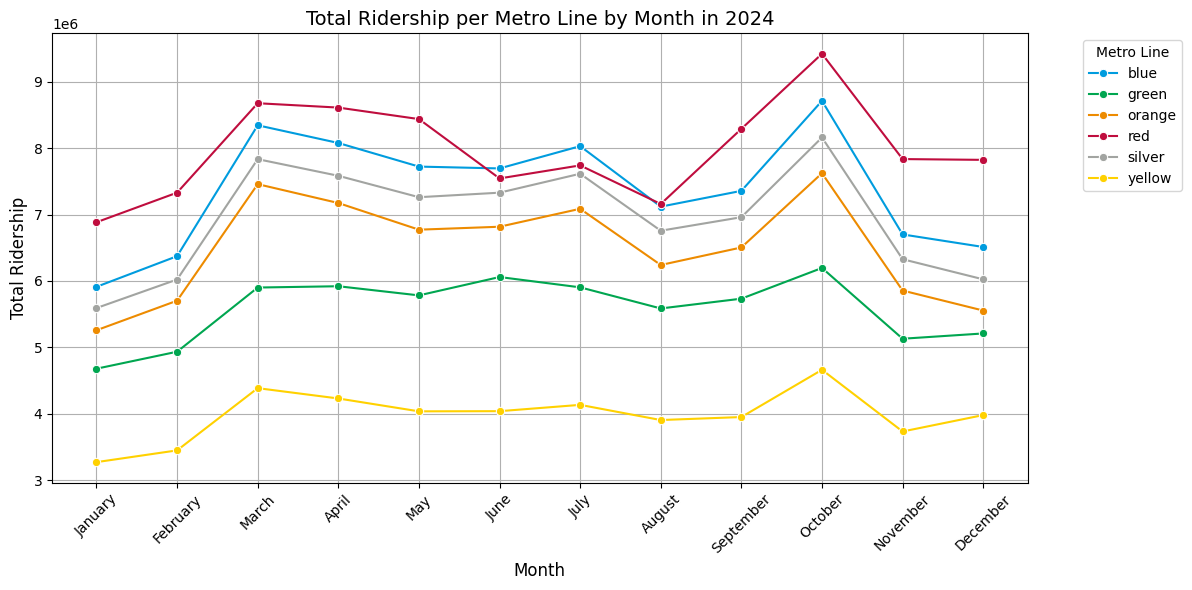

In [83]:
#LINE PLOT OF TOTAL RIDERSHIP PER METRO LINE BY MONTH

# Calculate Total Monthly Ridership
everyday_2024_w_metro_station_df["Total Monthly Ridership"] = (
    everyday_2024_w_metro_station_df["Total Entries"] + everyday_2024_w_metro_station_df["Total Exits"]
)

# Unpivot LINE columns
df_melted = everyday_2024_w_metro_station_df.melt(
    id_vars=["Month", "Total Monthly Ridership"], 
    value_vars=["LINE_1", "LINE_2", "LINE_3", "LINE_4", "LINE_5"], 
    var_name="Line_Type", 
    value_name="Metro Line"
)

# Group by 'Month' and 'Metro Line' to get total ridership per line per month
monthly_ridership = df_melted.groupby(["Metro Line", "Month"])["Total Monthly Ridership"].sum().reset_index()

# Pivot the data to have months as columns
monthly_ridership_pivot = monthly_ridership.pivot(index="Metro Line", columns="Month", values="Total Monthly Ridership")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_ridership_pivot = monthly_ridership_pivot[month_order]

monthly_ridership_pivot.reset_index(inplace=True)

# Melt the pivoted DataFrame to long format
monthly_ridership_long = monthly_ridership_pivot.melt(id_vars=["Metro Line"], 
                                                     var_name="Month", 
                                                     value_name="Total Ridership")


#line graph
plt.figure(figsize=(12, 6))

# Create a mapping from Metro Line to colors 
line_colors = {
    "red": "#BF0D3E",        
    "blue": "#009CDE",       
    "orange": "#ED8B00",     
    "yellow": "#FFD100",     
    "green": "#00A650",      
    "silver": "#A2A4A1"      
}
colors = [line_colors.get(line.lower(), "gray") for line in line_ridership["Metro Line"]]

# Plot the line graph using the custom palette
sns.lineplot(data=monthly_ridership_long, x="Month", y="Total Ridership", hue="Metro Line", marker="o", palette=colors)

# Set plot labels and title
plt.title("Total Ridership per Metro Line by Month in 2024", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Ridership", fontsize=12)
plt.xticks(rotation=45)

plt.legend(title="Metro Line", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

plt.show()
